In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datatable as dt

In [2]:
df = dt.fread('dataset/train.csv').to_pandas()

In [3]:
df.shape

(1460, 81)

In [4]:
na_cols = df.columns[df.isna().any()].to_list()

In [5]:
df[na_cols].isna().sum()/df.shape[0]*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [6]:
df.iloc[:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


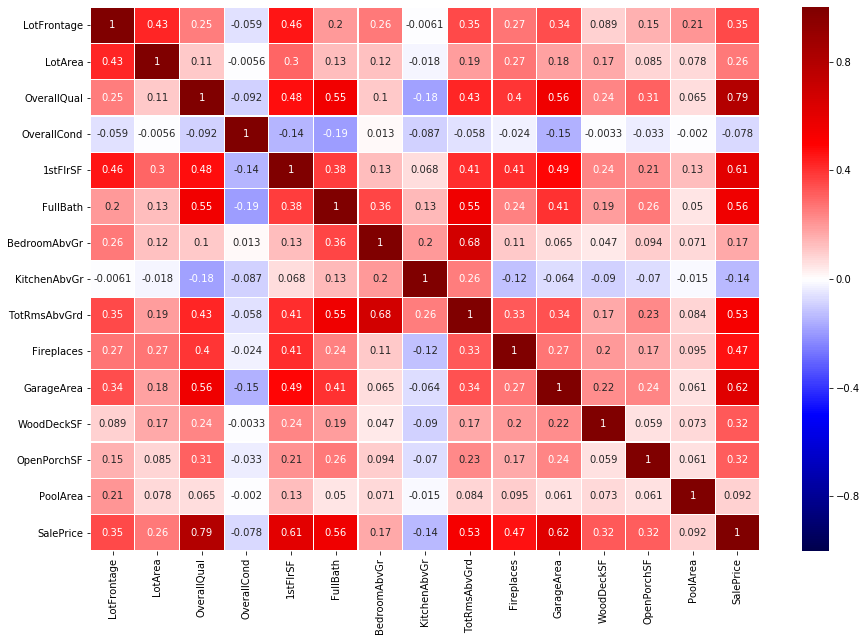

In [7]:
columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'SalePrice']

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df[columns].corr(), vmin=-1, vmax=1, cmap='seismic', linewidths=0.2, annot=True, ax=ax)
ylim = ax.set_ylim(15, 0)

- Positive Correlation: The most positive correlation is between OverallQuality and SalePrice meaning that Sale Price increases as Overall Qaulity of the house increases. This correlation also makes sense because the price of the house will depend on the Overall Quality of the house to some extent.
- Negative Correlation: The most negative correlation observed is between OverallCondition and number of FullBaths. The correlation shows that the Overall Condition of the house increases as the number of Full Baths in the house decrease. This seems to be a strange correlation and does not necessarily appear to be a causation. It is possible that the higher number of full baths causes cleanliness issues reducing the overall condition of the house.

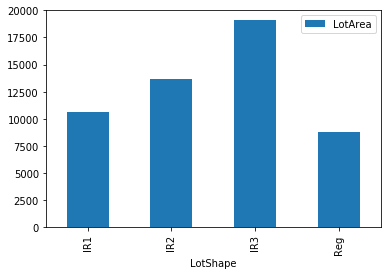

In [8]:
ax = df[['LotArea', 'LotShape']].groupby(['LotShape']).median().plot(kind='bar')

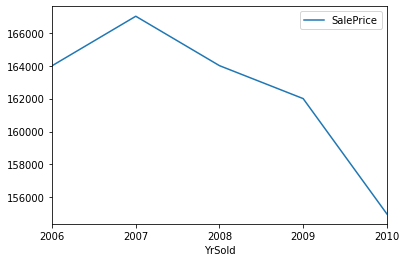

In [9]:
ax = df[['YrSold', 'SalePrice']].groupby(['YrSold']).median().plot()
ax.set_xticks(np.delete(ax.get_xticks(), [1, 3, 5, 7]))

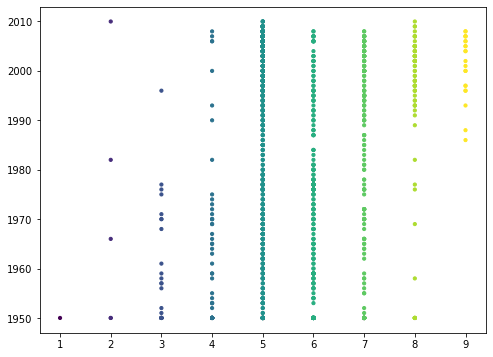

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df['OverallCond'], df['YearRemodAdd'], s=10, c=df['OverallCond'])

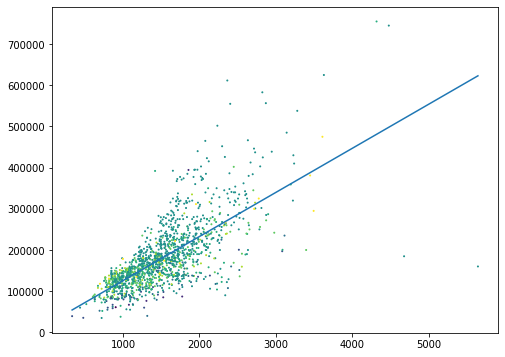

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df['GrLivArea'], df['SalePrice'], s=1, c=df['OverallCond'])
plt.plot(np.unique(df['GrLivArea']), np.poly1d(np.polyfit(df['GrLivArea'], df['SalePrice'], 1))(np.unique(df['GrLivArea'])))

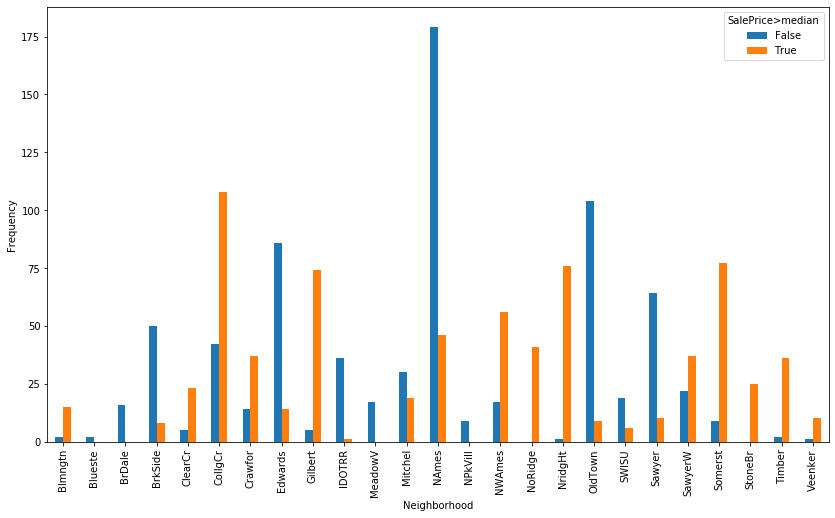

In [12]:
fig, ax = plt.subplots(figsize=(14,8))
pd.crosstab(df.Neighborhood, df['SalePrice'] > df.SalePrice.median()).plot(kind='bar', ax=ax)
plt.legend(title='SalePrice>median')
ylabel = ax.set_ylabel('Frequency')

In [13]:
from sklearn import preprocessing

landslope_map = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
qual_map = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1}

scoring_columns = ['LandSlope', 'ExterQual', 'ExterCond', 'LotArea', 'OverallQual', 'OverallCond', 
                   'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 
                   'GarageArea', 'PoolArea', 'SalePrice']
scaled_df = df.copy()
scaled_df['LandSlope'] = scaled_df['LandSlope'].map(landslope_map)
scaled_df['ExterQual'] = scaled_df['ExterQual'].map(qual_map)
scaled_df['ExterCond'] = scaled_df['ExterCond'].map(qual_map)

In [14]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(scaled_df[scoring_columns])
scaled_df = pd.DataFrame(scaled_df, columns=scoring_columns)

In [15]:
weights = {'LandSlope': 1, 'ExterQual': 1.1, 'ExterCond': 1.1, 'LotArea': 1.2, 'OverallQual': 2, 
           'OverallCond': 2, 'YearRemodAdd': 1.5, 'TotalBsmtSF': 0.8, 'GrLivArea': 1.5, 'FullBath': 1, 
           'TotRmsAbvGrd': 1, 'Fireplaces': 0.5, 'GarageArea': 1, 'PoolArea': 0.5, 'SalePrice': -1.5}

def scoring_function(row):
    score = 0
    for col, val in row.items():
        score += val * weights[col]
    return score

In [16]:
scaled_df['score'] = scaled_df.apply(scoring_function, axis=1)

In [17]:
ten_most_desireable_houses = scaled_df.nlargest(10, 'score')
ten_least_desireable_houses = scaled_df.nsmallest(10, 'score')

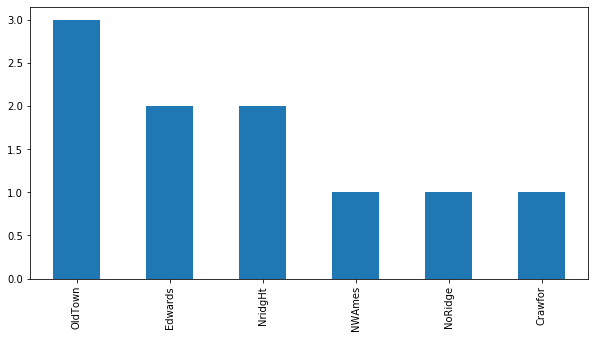

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
df.iloc[ten_most_desireable_houses.index]['Neighborhood'].value_counts().plot(kind='bar')

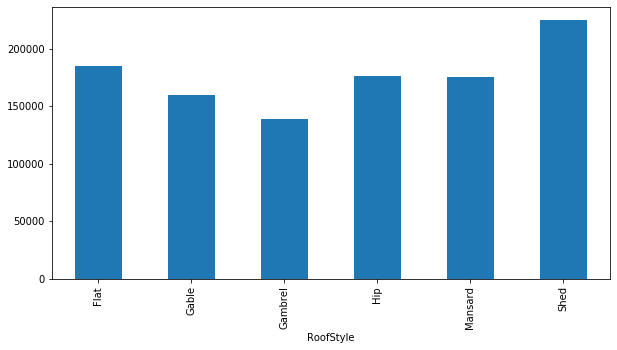

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
df.groupby(['RoofStyle'])['SalePrice'].median().plot(kind='bar', ax=ax)

In [20]:
# Map categorical names to correspoding ordinal values
qual_map = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'NA': 0}

# List of columns to be used for distance function
distance_columns = ['LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 
                    'KitchenAbvGr', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 
                    'Fireplaces', 'GarageArea', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 
                    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
categorical_cols = ['Street', 'LotShape', 'LandSlope', 'BldgType']

distance_df = df[distance_columns].copy()
categorical_df = df[categorical_cols].copy()

In [21]:
from sklearn import preprocessing

# Scale the values from 0 to 1 using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
scaled_values = scaler.fit_transform(distance_df)
scaled_df = pd.DataFrame(scaled_values, columns=distance_columns)

In [22]:
distance_df = pd.concat([scaled_df, categorical_df], axis=1)

In [23]:
# One hot encoding for categorical columns
for categorical_col in distance_df.select_dtypes(include=['object']).columns:
    distance_df[categorical_col] = pd.Categorical(distance_df[categorical_col])
distance_df = pd.get_dummies(distance_df)

In [24]:
distance_df

,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,...,LotShape_IR3,LotShape_Reg,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,0.033420,0.140098,0.119780,0.413559,0.375,0.333333,0.259231,0.666667,0.5,0.500000,...,0,1,1,0,0,1,0,0,0,0
1,0.038795,0.206547,0.212942,0.000000,0.375,0.333333,0.174830,0.666667,0.0,0.333333,...,0,1,1,0,0,1,0,0,0,0
2,0.046507,0.150573,0.134465,0.419370,0.375,0.333333,0.273549,0.666667,0.5,0.333333,...,0,0,1,0,0,1,0,0,0,0
3,0.038561,0.123732,0.143873,0.366102,0.375,0.333333,0.260550,0.333333,0.0,0.416667,...,0,0,1,0,0,1,0,0,0,0
4,0.060576,0.187398,0.186095,0.509927,0.500,0.333333,0.351168,0.666667,0.5,0.583333,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.030929,0.155974,0.142038,0.336077,0.375,0.333333,0.247362,0.666667,0.5,0.416667,...,0,1,1,0,0,1,0,0,0,0
1456,0.055505,0.252373,0.399036,0.000000,0.375,0.333333,0.327619,0.666667,0.0,0.416667,...,0,1,1,0,0,1,0,0,0,0
1457,0.036187,0.188543,0.195961,0.557869,0.500,0.333333,0.377920,0.666667,0.0,0.583333,...,0,1,1,0,0,1,0,0,0,0
1458,0.039342,0.176432,0.170721,0.000000,0.250,0.333333,0.140166,0.333333,0.0,0.250000,...,0,1,1,0,0,1,0,0,0,0


In [25]:
distance_mat = distance_df.values

norm = (distance_mat.T * distance_mat.T).sum(0, keepdims=True) ** .5

similarities = distance_mat @ distance_mat.T

similarities = similarities / norm / norm.T

In [26]:
np.argsort(similarities, axis=0)[-2]

array([1240,  780, 1167, ...,  852,  677, 1295])

In [27]:
unique_elements, counts_elements = np.unique(np.argsort(similarities, axis=0)[0], return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[  52  335  375  533  582  812  954 1337 1405]
 [1270   81   12    1   49   43    2    1    1]]


In [28]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(distance_mat)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.003s...
[t-SNE] Computed neighbors for 1460 samples in 0.133s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 0.234840
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.078133
[t-SNE] KL divergence after 300 iterations: 0.586200


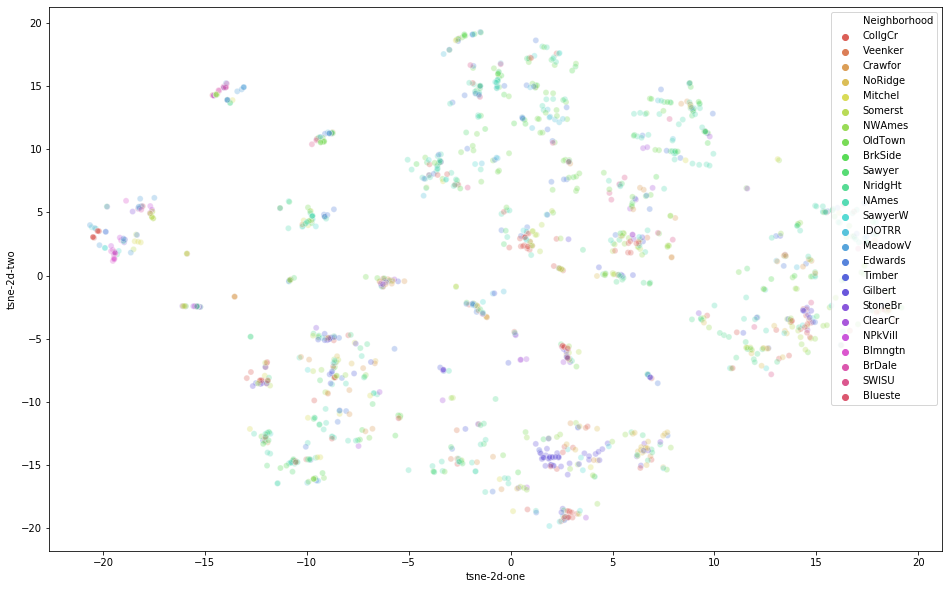

In [29]:
tsne_df = df.copy()

tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Neighborhood",
    palette=sns.color_palette("hls", n_colors=len(tsne_df.Neighborhood.value_counts())),
    data=tsne_df,
    legend="full", 
    alpha=0.3
)

In [30]:
# Map categorical names to correspoding ordinal values
qual_map = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'NA': 0}

# List of columns to be used for distance function
distance_columns = ['LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 
                    'KitchenAbvGr', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 
                    'Fireplaces', 'GarageArea', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 
                    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
categorical_cols = ['Street', 'LotShape', 'LandSlope', 'BldgType']
quality_cols = ['ExterCond', 'ExterQual', 'BsmtCond', 'BsmtQual', 'HeatingQC', 'KitchenQual', 
                'FireplaceQu', 'GarageCond', 'GarageQual', 'OverallCond', 'OverallQual']

distance_df = df[distance_columns].copy()
categorical_df = df[categorical_cols].copy()
quality_df = df[quality_cols].copy()

In [31]:
for col in quality_cols[:-2]:
    quality_df[col] = quality_df[col].map(qual_map).fillna(0)
    
distance_df = pd.concat([distance_df, quality_df], axis=1)
distance_columns = distance_columns + quality_cols

In [32]:
from sklearn import preprocessing

# Scale the values from 0 to 1 using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
scaled_values = scaler.fit_transform(distance_df)
scaled_df = pd.DataFrame(scaled_values, columns=distance_columns)

In [33]:
distance_df = pd.concat([scaled_df, categorical_df], axis=1)

In [34]:
# One hot encoding for categorical columns
for categorical_col in distance_df.select_dtypes(include=['object']).columns:
    distance_df[categorical_col] = pd.Categorical(distance_df[categorical_col])
distance_df = pd.get_dummies(distance_df)

In [35]:
distance_mat = distance_df.values

norm = (distance_mat.T * distance_mat.T).sum(0, keepdims=True) ** .5

similarities = distance_mat @ distance_mat.T

similarities = similarities / norm / norm.T

In [36]:
np.unique(np.argsort(similarities, axis=0)[0], return_counts=True)

(array([  52,  335,  375,  533,  582,  705,  942, 1090]),
 array([496, 165, 300, 446,   5,  45,   2,   1]))

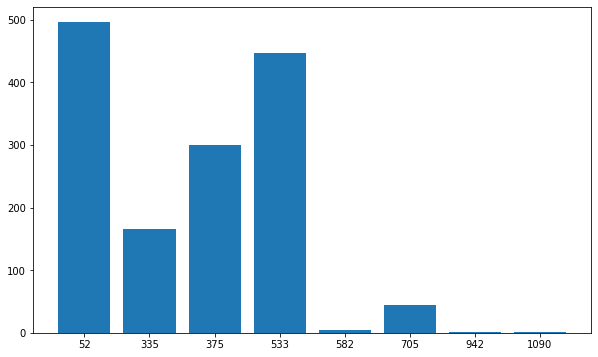

In [37]:
unique_elements, counts = np.unique(np.argsort(similarities, axis=0)[0], return_counts=True)
unique_elements = [str(i) for i in unique_elements]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x=unique_elements, height=counts)
xticks = ax.set_xticks(unique_elements)

In [38]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(distance_mat)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.002s...
[t-SNE] Computed neighbors for 1460 samples in 0.172s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 0.349053
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.470097
[t-SNE] KL divergence after 300 iterations: 0.686338


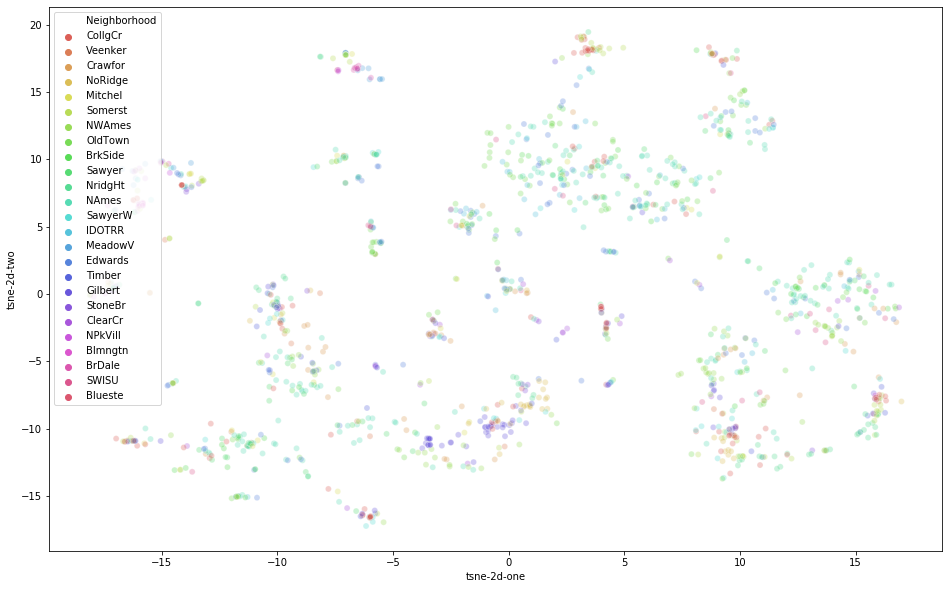

In [39]:
tsne_df = df.copy()

tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Neighborhood",
    palette=sns.color_palette("hls", n_colors=len(tsne_df.Neighborhood.value_counts())),
    data=tsne_df,
    legend="full", 
    alpha=0.3
)

In [40]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=20, affinity='precomputed', linkage='average')
house_clusters = cluster.fit(1.0 - similarities)

cluster_df = pd.concat([df.copy(), pd.DataFrame(house_clusters.labels_, columns=['cluster_label'])], axis=1)

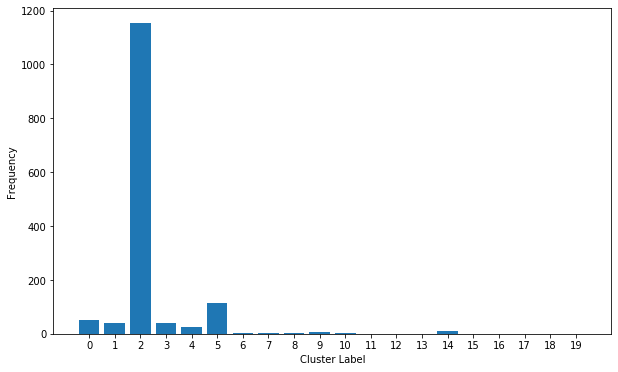

In [41]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x=cluster_df.cluster_label.value_counts().index, height=cluster_df.cluster_label.value_counts())
ax.set_xlabel('Cluster Label')
ax.set_ylabel('Frequency')
xticks = ax.set_xticks(cluster_df.cluster_label.value_counts().index)

In [42]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(distance_mat)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.003s...
[t-SNE] Computed neighbors for 1460 samples in 0.171s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 0.349053
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.473255
[t-SNE] KL divergence after 300 iterations: 0.684680


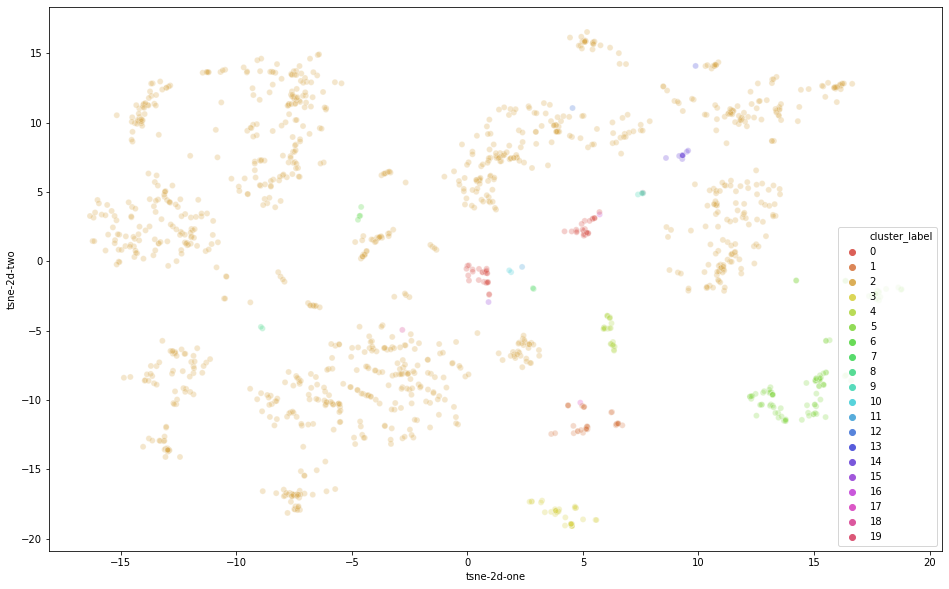

In [43]:
cluster_df['tsne-2d-one'] = tsne_results[:,0]
cluster_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_label",
    palette=sns.color_palette("hls", n_colors=len(cluster_df.cluster_label.value_counts())),
    data=cluster_df,
    legend="full", 
    alpha=0.3
)

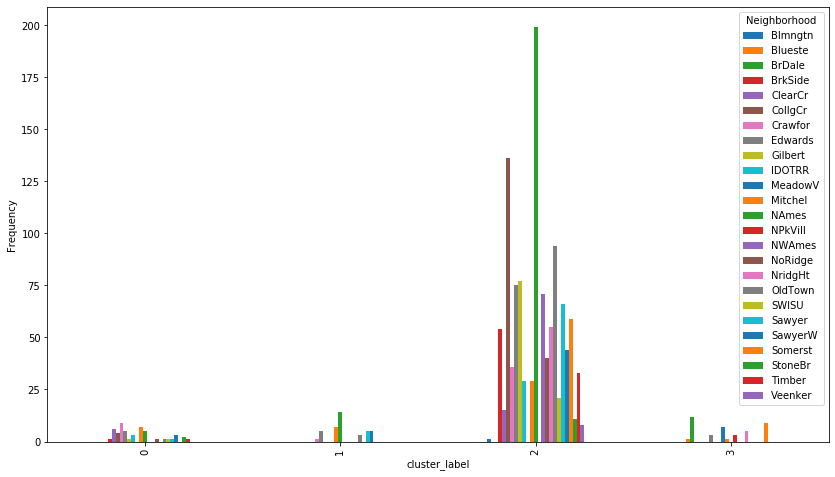

In [44]:
# Plot the frequency of Neighborhood for SalePrice > median
fig, ax = plt.subplots(figsize=(14,8))
filtered_cluster_df = cluster_df[cluster_df['cluster_label'] < 4]
pd.crosstab(filtered_cluster_df.cluster_label, filtered_cluster_df.Neighborhood).plot(kind='bar', ax=ax)
ylabel = ax.set_ylabel('Frequency')

In [45]:
dataset = df.copy()

In [46]:
# PRE-PROCESSING

# Replace NaNs with NA for categorical columns
na_cols = ['Alley', 'MasVnrType', 'GarageType', 'GarageFinish']
for col in na_cols:
    dataset[col] = dataset[col].fillna('NA')

# Replace NaNs with 0 for categorical columns that can be converted to ordinals
qual_map = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'NA': 0}
qual_cols = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'HeatingQC', 'GarageQual', 'GarageCond', 
             'ExterQual', 'ExterCond', 'KitchenQual', 'PoolQC']
for col in qual_cols:
    dataset[col] = dataset[col].map(qual_map).fillna(0)

In [47]:
numerical_cols = ['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'ExterQual', 
                 'ExterCond', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'HeatingQC', 
                 '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageArea', 
                 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                 'ScreenPorch']

dataset = dataset[numerical_cols]

In [48]:
# from sklearn.preprocessing import StandardScaler

# rob_scaler = StandardScaler()
# for col in numerical_cols:
#     dataset[col] = rob_scaler.fit_transform(dataset[col].values.reshape(-1,1))

In [49]:
categorical_cols = ['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'Foundation', 
                    'CentralAir', 'GarageType', 'GarageFinish']
ohe = pd.get_dummies(df[categorical_cols])
dataset = dataset.join(ohe)
training_cols = dataset.columns.to_list()

In [50]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = dataset
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
training_cols[np.argmin(regressor.coef_)]

'GarageType_2Types'

In [52]:
y_pred = regressor.predict(X_test)

In [53]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred))))

Root Mean Squared Error: 0.1772033705930145


In [54]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred))))

Root Mean Squared Error: 0.1772033705930145


In [55]:
test_df = dt.fread('dataset/test.csv').to_pandas()

In [56]:
dataset = test_df.copy()

In [57]:
# PRE-PROCESSING

# Replace NaNs with NA for categorical columns
na_cols = ['Alley', 'MasVnrType', 'GarageType', 'GarageFinish']
for col in na_cols:
    dataset[col] = dataset[col].fillna('NA')
    
nan_cols = ['TotalBsmtSF', 'GarageArea']
for col in nan_cols:
    dataset[col] = dataset[col].fillna(0)

# Replace NaNs with 0 for categorical columns that can be converted to ordinals
qual_map = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'NA': 0}
qual_cols = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'HeatingQC', 'GarageQual', 'GarageCond', 
             'ExterQual', 'ExterCond', 'KitchenQual', 'PoolQC']
for col in qual_cols:
    dataset[col] = dataset[col].map(qual_map).fillna(0)

In [58]:
numerical_cols = ['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'ExterQual', 
                 'ExterCond', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'HeatingQC', 
                 '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageArea', 
                 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                 'ScreenPorch']

dataset = dataset[numerical_cols]

In [59]:
# from sklearn.preprocessing import StandardScaler

# rob_scaler = StandardScaler()
# for col in numerical_cols:
#     dataset[col] = rob_scaler.fit_transform(dataset[col].values.reshape(-1,1))

In [60]:
categorical_cols = ['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'Foundation', 
                    'CentralAir', 'GarageType', 'GarageFinish']
ohe = pd.get_dummies(df[categorical_cols])
dataset = dataset.join(ohe)
test_cols = dataset.columns.to_list()

In [61]:
y_pred = regressor.predict(dataset)

In [62]:
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
output.to_csv('dataset/submission_1.csv', index=False)

In [91]:
external_df = dt.fread("dataset/AmesRealEstateData.csv").to_pandas()

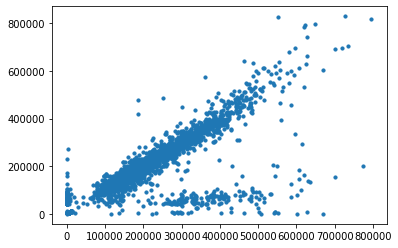

In [92]:
plt.scatter(external_df['TtlVal_AsrYr'], external_df['SalePrice'], s=10)

In [110]:
common_neighborhoods = external_df[external_df['Neighborhood'].isin(df['Neighborhood'])].Neighborhood.value_counts().index.to_list()

In [118]:
neighborhood_value_map = external_df[external_df['Neighborhood'].isin(common_neighborhoods)].groupby(['Neighborhood'])['TtlVal_AsrYr'].mean().to_dict()

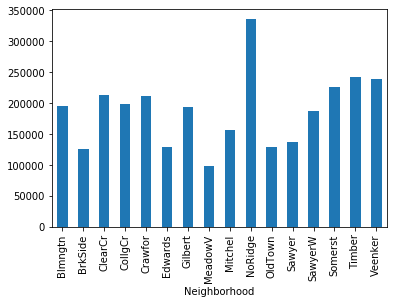

In [112]:
df[df['Neighborhood'].isin(common_neighborhoods)].groupby(['Neighborhood'])['SalePrice'].mean().plot(kind='bar')

In [114]:
neighborhoods_mean = external_df[external_df['Neighborhood'].isin(common_neighborhoods)]['TtlVal_AsrYr'].mean()

In [115]:
neighborhoods_mean

226627.08925750395

In [120]:
df['NeighborhoodValue'] = df['Neighborhood'].apply(lambda x: neighborhood_value_map.get(x, neighborhoods_mean))

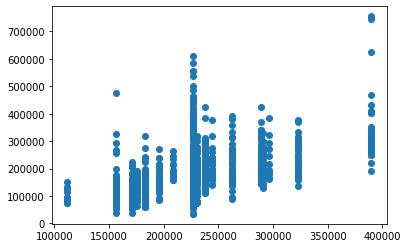

In [134]:
plt.scatter(df['NeighborhoodValue'], df['SalePrice'])

In [128]:
trainset = df.copy()

In [129]:
# PRE-PROCESSING

# Replace NaNs with NA for categorical columns
na_cols = ['Alley', 'MasVnrType', 'GarageType', 'GarageFinish']
for col in na_cols:
    trainset[col] = trainset[col].fillna('NA')

# Replace NaNs with 0 for categorical columns that can be converted to ordinals
qual_map = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'NA': 0}
qual_cols = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'HeatingQC', 'GarageQual', 'GarageCond', 
             'ExterQual', 'ExterCond', 'KitchenQual', 'PoolQC']
for col in qual_cols:
    trainset[col] = trainset[col].map(qual_map).fillna(0)

In [130]:
# Numerical Columns to be used for training
numerical_cols = ['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'ExterQual', 
                 'ExterCond', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'HeatingQC', 
                 '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageArea', 
                 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                 'ScreenPorch', 'NeighborhoodValue']

trainset = trainset[numerical_cols]

In [131]:
# Categorical columns to be used for training
categorical_cols = ['MSSubClass', 'MSZoning', 'LotConfig', 'BldgType', 'HouseStyle', 'Foundation', 
                    'CentralAir', 'GarageType', 'GarageFinish']
# Perform one hot encoding and join it with existing training set
ohe = pd.get_dummies(df[categorical_cols])
trainset = trainset.join(ohe)
training_cols = trainset.columns.to_list()

In [132]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = trainset
y = df['SalePrice']

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Learn a linear regression model on the train set
regressor = LinearRegression().fit(X_train, y_train)

In [133]:
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred))))

Root Mean Squared Error: 0.19375590622505134


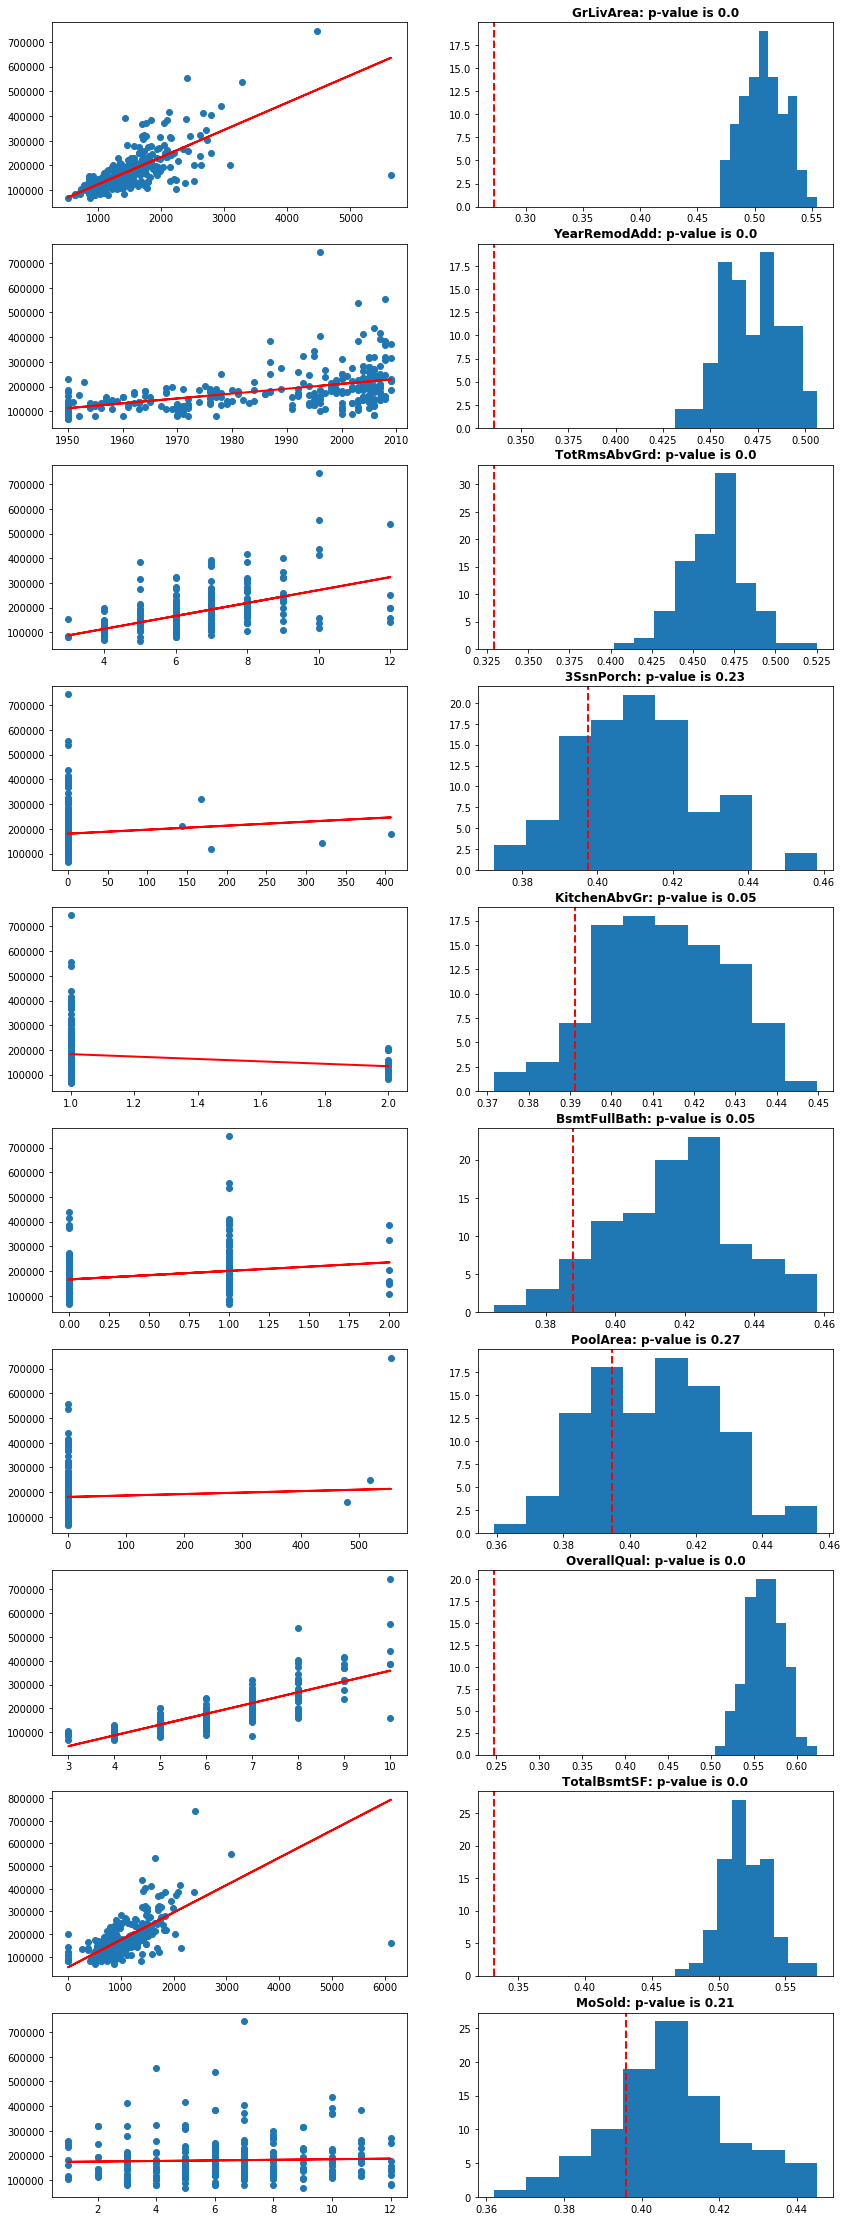

In [63]:
trainset = df.copy()

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

permutation_test_cols = ['GrLivArea', 'YearRemodAdd', 'TotRmsAbvGrd', '3SsnPorch', 'KitchenAbvGr', 
                         'BsmtFullBath', 'PoolArea', 'OverallQual', 'TotalBsmtSF', 'MoSold']
n_rows = len(permutation_test_cols)
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 4 * n_rows))

for test_number, col in enumerate(permutation_test_cols):
    X = trainset[col].values.reshape(-1,1)
    y = trainset['SalePrice'].values.reshape(-1,1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    regressor = LinearRegression().fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    rmse_y = np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred)))

    n_permutations = 100
    rmse_random = np.zeros((n_permutations))
    for i in range(n_permutations):
        y_random = trainset.sample(y_test.shape[0])['SalePrice'].values.reshape(-1, 1)
        rmse_random[i] = np.sqrt(metrics.mean_squared_error(np.log(y_random), np.log(y_pred)))

    p_value = len(np.where(rmse_random <= rmse_y)[0]) / n_permutations

    ax1 = axes[test_number][0]
    ax2 = axes[test_number][1]
    
    ax1.scatter(X_test, y_test)
    ax1.plot(X_test, y_pred, color='red', linewidth=2)
    
    ax2.hist(rmse_random)
    ax2.axvline(rmse_y, color='red', linestyle='dashed', linewidth=2)
    ax2.set_title("{0}: p-value is {1}".format(col, p_value), fontweight='bold', fontsize=12)

In [222]:
test_df['SalePrice'] = -1
test_df['NeighborhoodValue'] = -1
dataset = pd.concat([df, test_df], axis=0)

In [301]:
dataset = df.copy()

In [302]:
# PRE-PROCESSING

# Replace NaNs with NA for categorical columns
na_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
           'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Fence', 
           'MiscFeature', 'PoolQC']
for col in na_cols:
    dataset[col] = dataset[col].fillna('None')
    
nan_cols = ['TotalBsmtSF', 'GarageArea', 'MasVnrArea']
for col in nan_cols:
    dataset[col] = dataset[col].fillna(0)
    
dataset.LotFrontage = dataset.fillna(dataset.LotFrontage.mean())
dataset.GarageYrBlt = dataset.fillna(dataset.GarageYrBlt.median())

# Replace NaNs with 0 for categorical columns that can be converted to ordinals
qual_map = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'NA': 0}
qual_cols = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'HeatingQC', 'GarageQual', 'GarageCond', 
             'ExterQual', 'ExterCond', 'KitchenQual', 'PoolQC']
for col in qual_cols:
    dataset[col] = dataset[col].map(qual_map).fillna(0)

In [303]:
numerical_cols = ['LotArea', 'LotFrontage', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 
                  'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 
                  'GarageArea', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 
                  'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'BsmtUnfSF', 'GarageCars']

dataset = dataset[numerical_cols]

In [304]:
categorical_cols = ['MSSubClass', 'MSZoning', 'Alley', 'Street', 'LotConfig', 'LotShape', 
                    'LandContour', 'LandSlope', 'Neighborhood', 'BldgType', 'RoofStyle', 
                    'Foundation', 'CentralAir', 'GarageType', 'GarageFinish']
ohe = pd.get_dummies(df[categorical_cols])
dataset = dataset.join(ohe)
training_cols = dataset.columns.to_list()

In [305]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(dataset)
scaled_df = pd.DataFrame(scaled_df, columns=training_cols)

import joblib

joblib.dump(scaler, "models/scaler.pkl")

['models/scaler.pkl']

In [306]:
from sklearn.model_selection import train_test_split 

X = scaled_df[:1460]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [248]:
from sklearn.linear_model import Lasso

regressor = Lasso(alpha=0.01, max_iter=10e5).fit(X_train, y_train)
print("Train score: {}".format(regressor.score(X_train, y_train)))
print("Test score: {}".format(regressor.score(X_test, y_test)))
print("Coeffs used: {}".format(np.sum(regressor.coef_!=0)))

Train score: 0.8733062037602113
Test score: 0.7306577861692488
Coeffs used: 92


In [249]:
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred))))

Root Mean Squared Error: 0.18621003250148832


In [72]:
joblib.dump(regressor, "models/lasso.pkl")

['models/lasso.pkl']

In [250]:
from sklearn.linear_model import Ridge

regressor = Ridge(alpha=100).fit(X_train, y_train)
print("Train score: {}".format(regressor.score(X_train, y_train)))
print("Test score: {}".format(regressor.score(X_test, y_test)))
print("Coeffs used: {}".format(np.sum(regressor.coef_!=0)))

Train score: 0.7308013157329165
Test score: 0.665809721791899
Coeffs used: 101


In [251]:
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred))))

Root Mean Squared Error: 0.19436050284469447


In [75]:
joblib.dump(regressor, "models/ridge.pkl")

['models/ridge.pkl']

In [252]:
from sklearn.linear_model import TheilSenRegressor

regressor = TheilSenRegressor().fit(X_train, y_train)
print("Train score: {}".format(regressor.score(X_train, y_train)))
print("Test score: {}".format(regressor.score(X_test, y_test)))

Train score: 0.8628393534778848
Test score: 0.7089501205090601


In [253]:
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred))))

Root Mean Squared Error: 0.20159953080260548


In [78]:
joblib.dump(regressor, "models/theilsen.pkl")

['models/theilsen.pkl']

In [254]:
from sklearn.linear_model import RANSACRegressor

regressor = RANSACRegressor().fit(X_train, y_train)
print("Train score: {}".format(regressor.score(X_train, y_train)))
print("Test score: {}".format(regressor.score(X_test, y_test)))

Train score: -3.527319545532687e+19
Test score: -2.5158456814760496e+20


In [255]:
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred))))

/home/rmodi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [81]:
joblib.dump(regressor, "models/ransac.pkl")

['models/ransac.pkl']

In [256]:
from sklearn.linear_model import HuberRegressor

regressor = HuberRegressor().fit(X_train, y_train)
print("Train score: {}".format(regressor.score(X_train, y_train)))
print("Test score: {}".format(regressor.score(X_test, y_test)))

Train score: 0.8517905991129555
Test score: 0.7486781638710188


In [257]:
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred))))

Root Mean Squared Error: 0.17216738785450855


In [84]:
joblib.dump(regressor, "models/huber.pkl")

['models/huber.pkl']

In [258]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
print("Train score: {}".format(regressor.score(X_train, y_train)))
print("Test score: {}".format(regressor.score(X_test, y_test)))

Train score: 0.9803968689417858
Test score: 0.8363340012540978


In [259]:
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred))))

Root Mean Squared Error: 0.143301172033437


In [87]:
joblib.dump(regressor, "models/randomforest.pkl")

['models/randomforest.pkl']

In [307]:
import xgboost as xgb

regressor = xgb.XGBRegressor(n_estimators=1000, objective='reg:squarederror').fit(X_train, y_train)

print("Train score: {}".format(regressor.score(X_train, y_train)))
print("Test score: {}".format(regressor.score(X_test, y_test)))

/home/rmodi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Train score: 0.9976976162822182
Test score: 0.9056559619958364


In [308]:
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred))))

Root Mean Squared Error: 0.12602711316695525


In [309]:
joblib.dump(regressor, "models/xgb.pkl")

['models/xgb.pkl']

In [271]:
from sklearn.linear_model import ElasticNet

regressor = ElasticNet().fit(X_train, y_train)

print("Train score: {}".format(regressor.score(X_train, y_train)))
print("Test score: {}".format(regressor.score(X_test, y_test)))

Train score: 0.5096262690594748
Test score: 0.4686083675112115


In [272]:
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred))))

Root Mean Squared Error: 0.25956636413348505


In [160]:
joblib.dump(regressor, "models/elasticnet.pkl")

['models/xgb.pkl']

In [215]:
X[X.isna()]

,LotArea,LotFrontage,OverallQual,OverallCond,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,...,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [300]:
joblib.dump(training_cols, 'models/training_cols.pkl')

['models/training_cols.pkl']